In [1]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
import analysis2 as a2
from IPython.display import display, HTML
sys.path.append('/home/janekg89/Develop/Pycharm_Projects/flutype_webapp')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "flutype_webapp.settings")
import django
django.setup()
from flutype.models import Spot
import preprocessing as pre
#from preprocessing import mean_on_analyte_batch, 
import seaborn as sns
from itertools import combinations

import matplotlib.cm as cm


****************************************
RUNNING IN DEVELOP
****************************************


/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)
/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:

cs = ["2018_01_24_slide_21","2018_01_24_slide_22"]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__sid__in=cs)
spots_dj = spots_dj.filter(spot_collection__sid = "quant1")
#spots_dj = spots_dj.filter(circle_quality__gte = 0.3)

In [3]:
#cs = ["2018_03_21_slide_31",]
#spots_dj =  spots_dj.exclude(raw_spot__raw_spot_collection__sid__in=cs)
data = a2.Data(spots_dj=spots_dj)#.outlier_filtering()

In [4]:
data.spots_pd

,Ligand Batch,Ligand Batch Concentration,Ligand,Analyte Batch,Analyte,Intensity,Std,Circle Quality,Collection,Study,Row,Column,Collection Type,Replica
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
mean_on_anlyte_batch = data.mean_on_analyte_batch()
mean_spots_grouped = mean_on_anlyte_batch.groupby("Analyte Batch")
grouped_combinations = combinations(mean_spots_grouped,2)

In [6]:
peptide_c_signif = data.ligand_batch_significance()


In [7]:
len(list(grouped_combinations))

1

In [8]:
peptide_c_signif.groupby("Ligand Batch").apply(lambda x: x["Significance"].max()).sort_values(ascending=False)

Ligand Batch
P061-1       7.533643e-01
P001-1       5.053351e-01
P014-1       4.255623e-04
P050-0.25    3.416632e-04
P011-1       5.957206e-05
P049-0.5     3.752463e-05
P010-1       2.974130e-05
P050-1       1.189348e-05
P050-0.5     5.049967e-06
P049-1       4.384107e-06
P052-1       2.204061e-06
P014-0.5     6.530663e-07
P012-1       2.330285e-07
P049-0.25    6.135738e-08
P061-0.25    5.983070e-08
P061-0.5     5.568769e-08
P010-0.5     3.082541e-08
P012-0.5     9.855832e-09
P013-0.5     1.519783e-09
P010-0.25    8.972215e-10
P011-0.5     3.629710e-10
P012-0.25    3.207239e-10
P013-1       1.912998e-10
P052-0.25    1.861513e-10
P001-0.5     1.239299e-10
P011-0.25    4.228130e-11
LF-0.5       2.124436e-11
P001-0.25    2.028877e-11
P052-0.5     1.628449e-11
LF-1         2.694511e-12
P014-0.25    2.245922e-12
P013-0.25    3.881628e-13
LF-0.25      3.200501e-15
dtype: float64

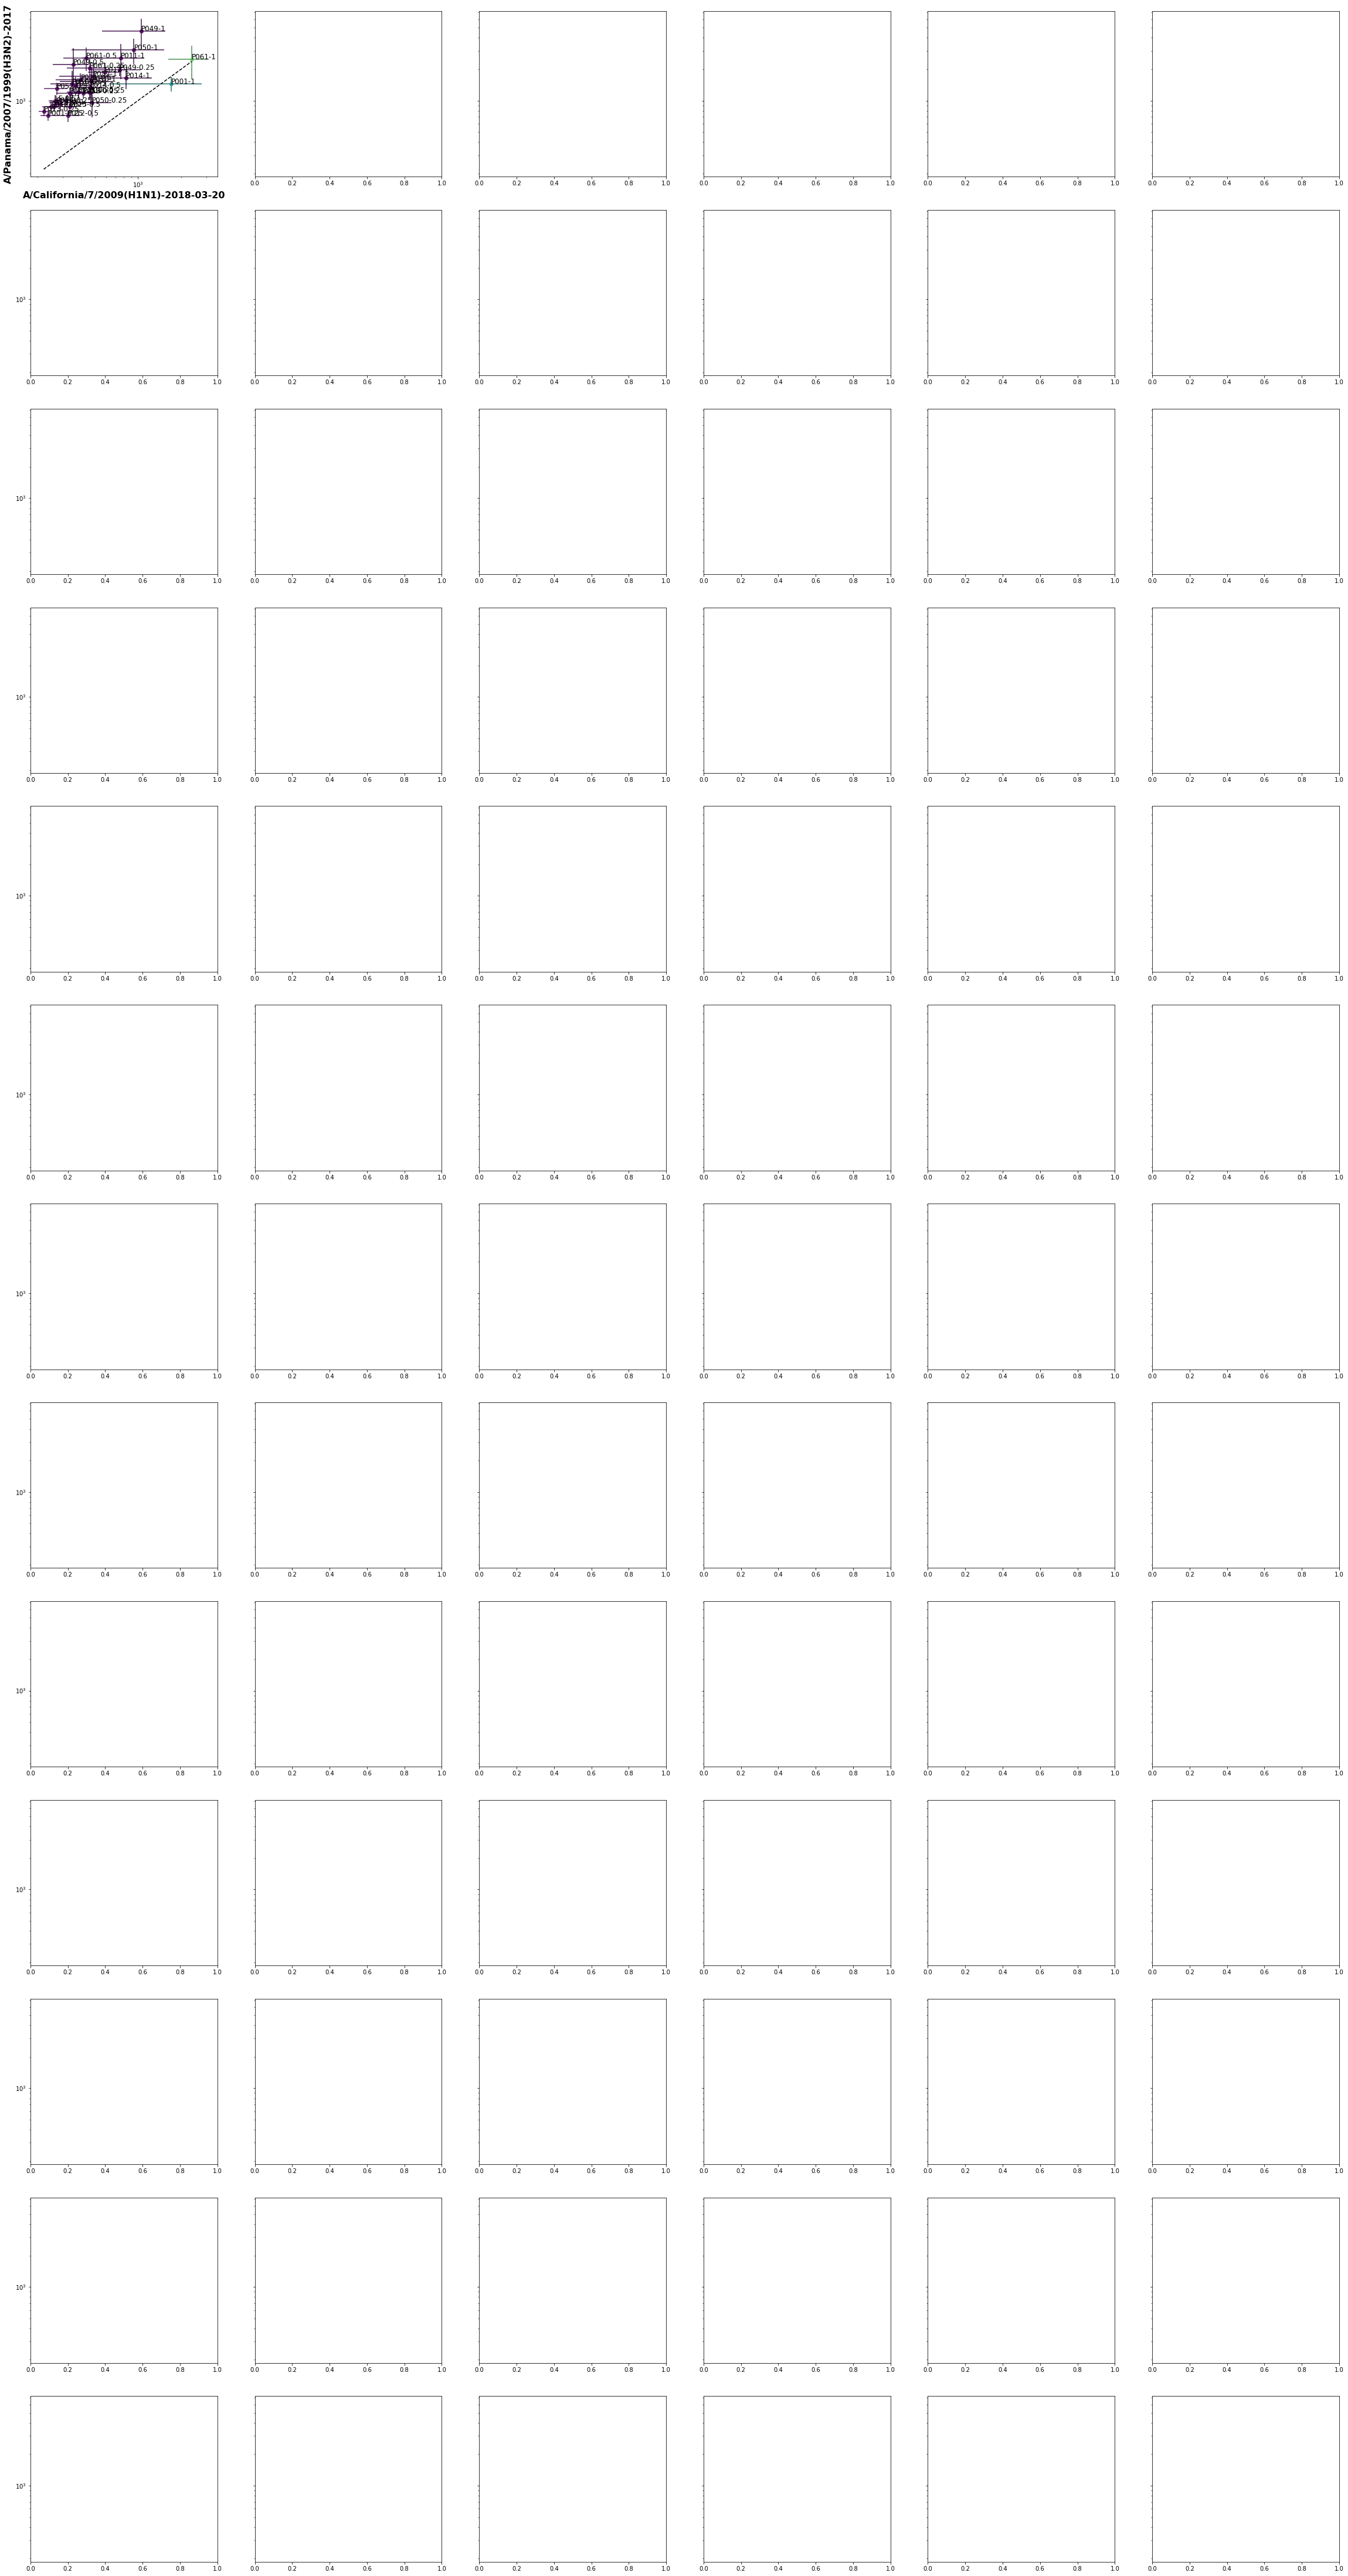

In [14]:
fig, axes = plt.subplots(ncols=6,nrows=13, figsize = (40,80), sharey=True)

ax_it = iter(axes.flatten())
peptide_c_signif.dropna(inplace=True)
cmap = cm.viridis
for name, d in peptide_c_signif.groupby("Analyte Batches"):
    x = y = np.linspace(peptide_c_signif.V1_I.min(),peptide_c_signif.V1_I.max())
    ax = next(ax_it)
    ax.plot(x,y,linestyle="--",marker=" ", c="k", alpha=1)
    #ax.set_title("{} vs. {}".format(name[1],name[0]), size = 20)
    ax.set_xlabel(name[0], size = 16, weight = 'bold')
    ax.set_ylabel(name[1], size = 16, weight = 'bold')
    #ax.set_xlim(0,x.max())
    #ax.set_ylim(0,y.max())

    
    ax.set_xscale("log")
    ax.set_yscale("log")



    #norm = Normalize(d.Significance.min(),d.Significance.max())
    d.sort_values("Significance",ascending=False, inplace=True)
    boundary = 0.15
    #d_selected = d[d["Significance"] < boundary]
    #d_n = d[d["Significance"] > boundary]
    
    d_selected = d[~d["Ligand Batch"].isin(["P125","P084","Nenad","132","P102"])]
    d_n = d
    
    #d_selected = d.loc[d["Peptide"].isin(["Pep_80","Pep_43","Pep_55","Pep_56","Pep_59","Pep_61","Pep_63","Pep_83","Pep_94","Pep_95","Pep_98","Pep_100","Pep_102","Pep_103","Pep_121" ,"Pep_125","Pep_131.2","Nenad","Pep_49","Pep_50"])]
    #d_selected = d.loc[d["Ligand Batch"].isin(["Nenad"])]
    #d_selected = d.loc[d["Peptide"].isin(["Pep_43","Pep_55","Pep_56","Pep_59","Pep_63","Pep_131.2"])]


    

    alphas = iter(np.linspace(0.3,0.05,len(d)))
    

    for ii, dp in d_selected.iterrows():
        #if dp.Significance is not np.NaN:
            c = cmap(dp.Significance)
            ax.errorbar(x=dp.V1_I,y=dp.V2_I,xerr=dp.V1_Err,yerr=dp.V2_Err, c = c, fmt="o",linestyle="",alpha=0.8, capthick=2)
            ax.annotate(dp["Ligand Batch"],(dp.V1_I+0.01,dp.V2_I+0.01), size=12)
    
    for ii, dp in d_n.iterrows():
        c = cmap(dp.Significance)
        ax.errorbar(x=dp.V1_I,y=dp.V2_I,xerr=dp.V1_Err,yerr=dp.V2_Err, c = "k", fmt="o",linestyle="",alpha=next(alphas), ms = 0.5, capthick=1)
        
    extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    uri_name1 = name[0].replace("/","-")
    uri_name2 = name[1].replace("/","-")


#plt.savefig(directory+"all_correlations.png", bbox_inches="tight")    
plt.show()    

In [71]:
peptide_c_signif[peptide_c_signif["Ligand Batch"]=="P084"].sort_values(by="Significance")

,Ligand Batch,Analyte Batches,Significance,V1_I,V2_I,V1_Err,V2_Err,V1_Count,V2_Count
368,P084,"(A/Beijing/32/1992(H3N2)-2018-04-13, A/Hong Ko...",5.49394e-45,48392.7,3439.15,1758.8,506.195,23,15
412,P084,"(A/Beijing/32/1992(H3N2)-2018-04-13, A/Panama/...",1.0846e-42,48392.7,1867.91,1758.8,280.606,23,13
1620,P084,"(A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Swi...",2.34673e-41,3439.15,38660.9,506.195,2158.21,15,27
1842,P084,"(A/Panama/2007/1999(H3N2)-2018-04-13, A/Switze...",1.77971e-39,1867.91,38660.9,280.606,2158.21,13,27
1240,P084,"(A/California/7/2009(H1N1)-2018-04-13, A/Hong ...",1.13268e-38,43170.3,3439.15,2488.58,506.195,24,15
1279,P084,"(A/California/7/2009(H1N1)-2018-04-13, A/Panam...",1.06894e-36,43170.3,1867.91,2488.58,280.606,24,13
1649,P084,"(A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Tex...",2.31673e-35,3439.15,37335,506.195,2853.69,15,26
1875,P084,"(A/Panama/2007/1999(H3N2)-2018-04-13, A/Texas/...",1.05856e-33,1867.91,37335,280.606,2853.69,13,26
653,P084,"(A/Beijing/32/1992(H3N2)-2018-04-13, VicAlla-2...",5.56881e-32,48392.7,8411.3,1758.8,2470.26,23,10
1680,P084,"(A/Hong Kong/4801/2014(H3N2)-2018-04-13, A/Vic...",2.43194e-30,3439.15,38515.8,506.195,2855.36,15,18


In [69]:
peptide_c_signif.groupby("Ligand Batch").apply(lambda x: x["Significance"].min()).sort_values()

Ligand Batch
P084      5.493943e-45
P055      4.261089e-43
P116      2.248574e-42
P056      6.715651e-42
P103      5.328310e-37
P095      3.624353e-36
Nenad     4.311728e-35
P120      1.615829e-34
P059      2.604975e-33
P098      1.252241e-31
P125      2.691845e-31
P094      1.992645e-30
P124      3.155571e-28
P043      4.761997e-28
P100      2.409461e-27
P073      4.325237e-27
P082      8.440890e-26
P080      1.085548e-24
P106      1.305040e-23
P131.1    1.008519e-22
P121      1.151910e-22
P102      9.694864e-22
P132      4.749624e-21
P069      3.613313e-20
P136      1.845444e-19
P105      1.041879e-18
P130      1.013107e-17
P010      2.170166e-17
P099      3.359271e-17
P135      4.954036e-15
              ...     
P090      5.125478e-10
P115      7.123438e-09
P061      1.308017e-08
P081      4.469893e-08
P131.2    4.929625e-08
P050      9.780481e-08
P134      3.075490e-07
P127      3.449973e-07
P072      1.839199e-06
P101      2.981630e-06
P083      5.735376e-06
P086      1.757314e-0